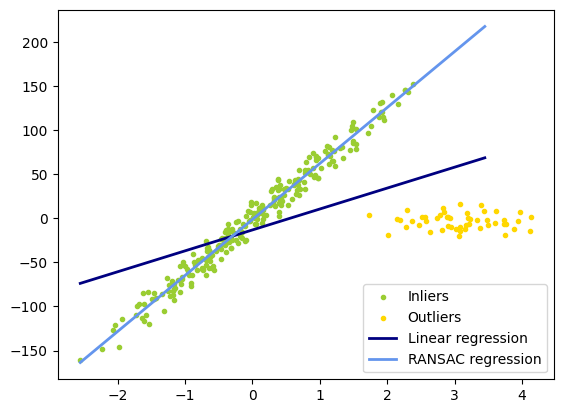

In [11]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets


samples = 300
outliers = 50


X, y, coef = datasets.make_regression(
    samples=samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

np.random.seed(0)
X[:outliers] = 3 + 0.5 * np.random.normal(size=(outliers, 1))
y[:outliers] = -3 + 10 * np.random.normal(size=outliers)

lr = linear_model.LinearRegression()
lr.fit(X, y)

ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers")
plt.scatter(X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers")
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regression")
plt.plot(
    line_X,
    line_y_ransac,
    color="cornflowerblue",
    linewidth=lw,
    label="RANSAC regression",
)
plt.legend(loc="lower right")
plt.show()